In [2]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/f9/2f/9c6eef6487faca5006ae1ba43cf6ab627c7e3d2a7ec5a3b8728e2105472d/selenium-4.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/f2/25/868488d8b05104e3d1bf162565bbadd5fe6d62bf903710e6402c3aaceb1e/trio_websocket-0.10.4-py3-none-any.whl.metadata
  Obtaining dependency information for exceptiongroup from https://files.pythonhosted.org/packages/ad/83/b71e58666f156a39fb29417e4c8ca4bc7400c0dd4ed9e8842ab54dc8c344/exceptiongroup-1.1.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/58.3 kB 2.0 MB/s eta 0:00:01
     ---------

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

In [2]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
service = Service(executable_path='chromedriver.exe')
options = webdriver.ChromeOptions()
# driver = webdriver.Chrome(service=service, options=options)
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

service = Service()
driver = webdriver.Chrome(service=service)

In [3]:
qna = []

In [4]:
def get_qna(container):
    question_in_container = container.contents[1].find('button').text.strip()    
    answer_in_container = container.contents[3].find('p').text.strip()
    qna.append({
        'question' : question_in_container,
        'answer' : answer_in_container
    })

In [167]:
def adhd_main():
    driver.get("https://www.psychiatry.org/patients-families/adhd/expert-q-and-a/")
    soup = BeautifulSoup(driver.page_source, 'lxml')
    container = soup.find_all("div" , {'class' : "c-ada-accordion"})
    for i in range(len(container)):
        get_qna(container[i])
    keys = qna[0].keys()
    with open('American_psychiatric_association.csv' , 'a+') as output_file:
        dict_writer = csv.DictWriter(output_file , keys)
        dict_writer.writeheader()
        dict_writer.writerows(qna)
        print("File Created Successfully")

In [168]:
adhd_main()

File Created Successfully


Another Method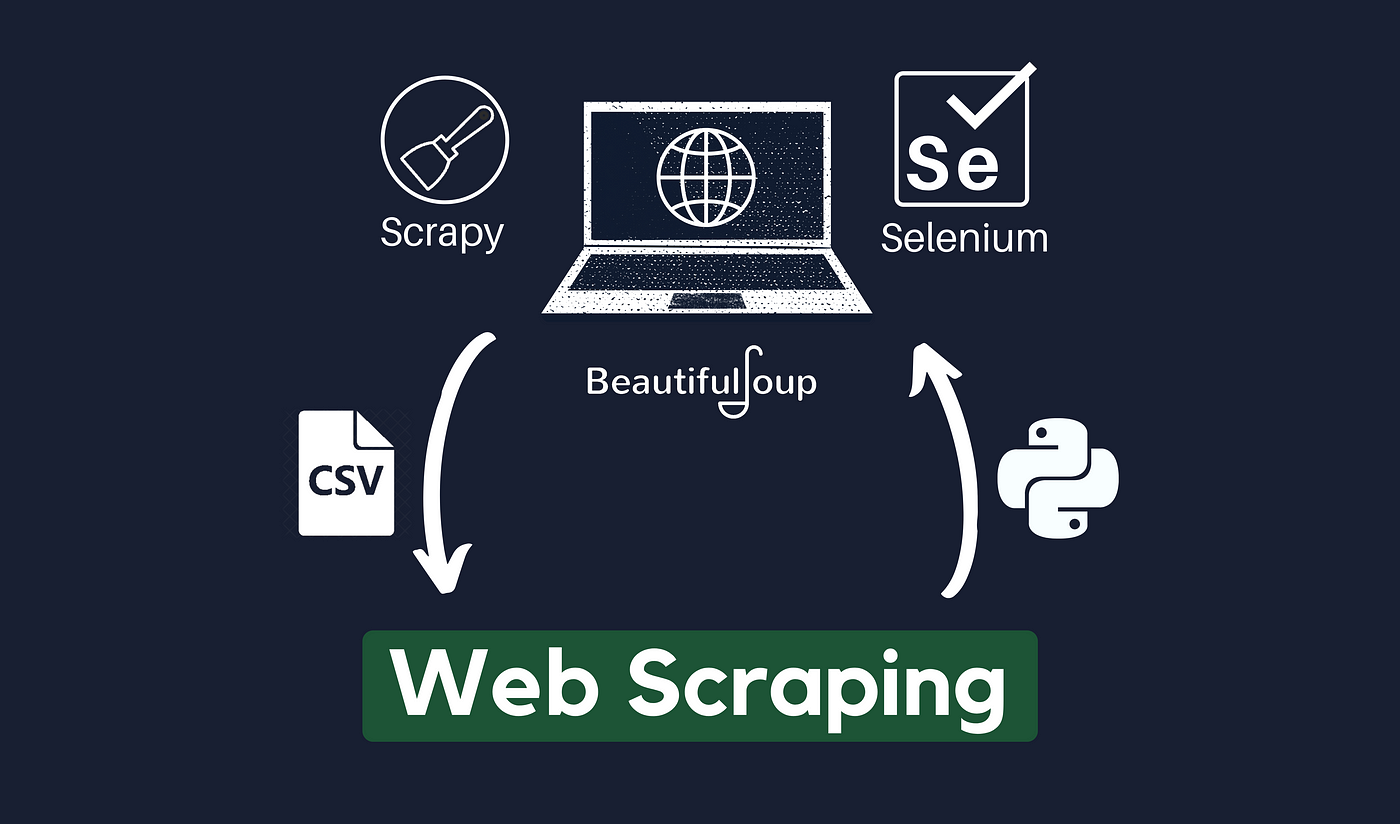

In [36]:
from selenium import webdriver
import selenium

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import WebDriverException
from datetime import datetime as dt
from bs4 import BeautifulSoup


browser = webdriver.Chrome()
browser.delete_all_cookies()
browser.get('https://www.psychiatry.org/patients-families/adhd/expert-q-and-a')

# iframe = browser.find_element(By.ID, 'head')
# browser.switch_to_frame(iframe)

c = browser.page_source
soup = BeautifulSoup(c, "html.parser")

all = soup.find_all("div", {"id": "divFAQ"})
print(all)

[<div class="c-article__body--h2 c-article__body--h2--blue" id="divFAQ">
<section class="u-mb--spacer">
<div class="c-ada-accordion">
<h2 class="c-ada-accordion--header" id="section_0" tabindex="-1">
<button aria-controls="panel-5255" aria-expanded="true" id="5255">
<span aria-hidden="true" class="icon moon-chevron-down"></span>
                                My son's teacher keeps sending notes home about his behavior at school and I don't understand the problem. He is fine with me, maybe a handful for his mother and his grandparents. Should I ask for them to change his teacher, or is there a problem?
                            </button>
</h2>
<div class="c-ada-accordion--panel" id="panel-5255" style="display: block;"><p>You are fortunate to have good management skills that help you with your child's behavior. Parents often get confusing reports about their children, and there are many factors that need to be considered. A good starting point is a meeting with your child's teacher a